# Pre-Lecture 

Question 1

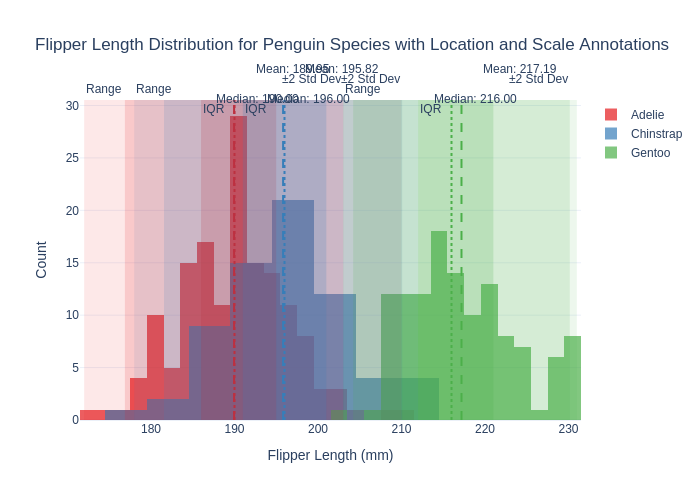

In [21]:
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import pandas as pd

# Load the penguins dataset
penguins = sns.load_dataset('penguins')

# Remove rows with missing values
penguins = penguins.dropna(subset=['flipper_length_mm'])

# Create an empty figure
fig = go.Figure()

# Get unique species
species_list = penguins['species'].unique()

# Colors for each species
colors = px.colors.qualitative.Set1

# Loop over each species to plot individual histograms and add lines/rectangles
for i, species in enumerate(species_list):
    species_data = penguins[penguins['species'] == species]
    
    # Calculate statistics
    flipper_length = species_data['flipper_length_mm']
    mean_val = flipper_length.mean()
    median_val = flipper_length.median()
    min_val = flipper_length.min()
    max_val = flipper_length.max()
    std_val = flipper_length.std()
    q1 = flipper_length.quantile(0.25)
    q3 = flipper_length.quantile(0.75)
    
    # Add histogram for the current species
    fig.add_trace(go.Histogram(x=flipper_length, 
                               name=f'{species}', 
                               marker_color=colors[i],
                               opacity=0.7))
    
    # Add a vertical line for the mean with larger yshift, xshift, and text rotation
    fig.add_vline(x=mean_val, line=dict(color=colors[i], dash="dash"), 
                  annotation_text=f'Mean: {mean_val:.2f}', 
                  annotation_position="top right",
                  annotation=dict(yshift=40, xshift=20, textangle=0))  # Increased yshift, xshift
    
    # Add a vertical line for the median with larger yshift, xshift, and text rotation
    fig.add_vline(x=median_val, line=dict(color=colors[i], dash="dot"), 
                  annotation_text=f'Median: {median_val:.2f}', 
                  annotation_position="top right",
                  annotation=dict(yshift=10, xshift=-20, textangle=0))  # Larger yshift and xshift
    
    # Add a rectangle for the range (min to max) with yshift
    fig.add_vrect(x0=min_val, x1=max_val, fillcolor=colors[i], opacity=0.1, line_width=0, 
                  annotation_text="Range", 
                  annotation_position="top left",
                  annotation=dict(yshift=20))  # Upward shift
    
    # Add a rectangle for the interquartile range (IQR: Q1 to Q3) with no shift
    fig.add_vrect(x0=q1, x1=q3, fillcolor=colors[i], opacity=0.2, line_width=0, 
                  annotation_text="IQR", 
                  annotation_position="top left")
    
    # Add a rectangle for two standard deviations away from the mean with yshift
    fig.add_vrect(x0=mean_val - 2*std_val, x1=mean_val + 2*std_val, 
                  fillcolor=colors[i], opacity=0.15, line_width=0, 
                  annotation_text="±2 Std Dev", 
                  annotation_position="top right",
                  annotation=dict(yshift=30))  # Upward shift for better readability

# Update layout
fig.update_layout(
    title='Flipper Length Distribution for Penguin Species with Location and Scale Annotations',
    xaxis_title='Flipper Length (mm)',
    yaxis_title='Count',
    barmode='overlay',
    template='plotly_white'
)

# Show the figure
fig.show(renderer="png")


Question 2

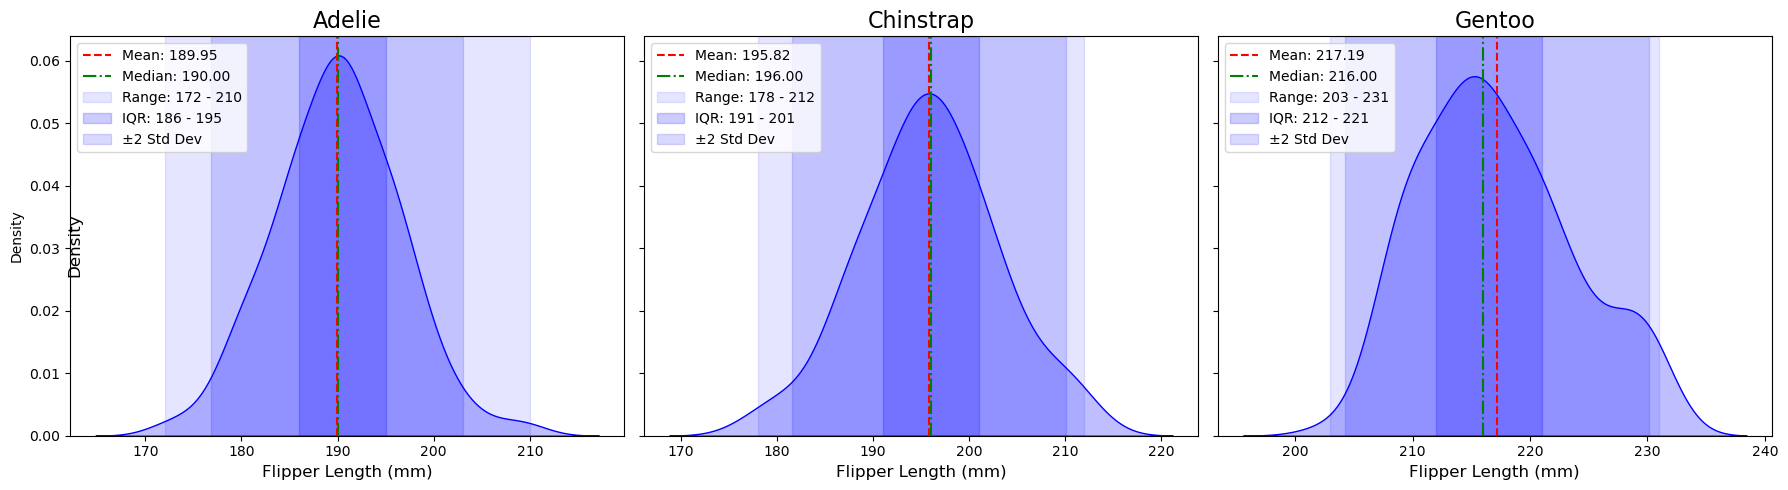

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load the penguins dataset
penguins = sns.load_dataset('penguins')

# Remove rows with missing values
penguins = penguins.dropna(subset=['flipper_length_mm'])

# Set up the figure with three subplots (one for each species)
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

# Get unique species
species_list = penguins['species'].unique()

# Loop through each species and plot KDE
for i, species in enumerate(species_list):
    species_data = penguins[penguins['species'] == species]
    flipper_length = species_data['flipper_length_mm']
    
    # Calculate statistics
    mean_val = flipper_length.mean()
    median_val = flipper_length.median()
    min_val = flipper_length.min()
    max_val = flipper_length.max()
    std_val = flipper_length.std()
    q1 = flipper_length.quantile(0.25)
    q3 = flipper_length.quantile(0.75)
    
    # Create the KDE plot for each species with fill
    sns.kdeplot(flipper_length, ax=axes[i], fill=True, color='blue')
    axes[i].set_title(f'{species}', fontsize=16)
    axes[i].set_xlabel('Flipper Length (mm)', fontsize=12)
    
    # Add vertical line for mean
    axes[i].axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.2f}')
    
    # Add vertical line for median
    axes[i].axvline(median_val, color='green', linestyle='-.', label=f'Median: {median_val:.2f}')
    
    # Add shaded region for the range (min to max)
    axes[i].axvspan(min_val, max_val, color='blue', alpha=0.1, label=f'Range: {min_val:.0f} - {max_val:.0f}')
    
    # Add shaded region for the interquartile range (IQR)
    axes[i].axvspan(q1, q3, color='blue', alpha=0.2, label=f'IQR: {q1:.0f} - {q3:.0f}')
    
    # Add shaded region for two standard deviations from the mean
    axes[i].axvspan(mean_val - 2*std_val, mean_val + 2*std_val, color='blue', alpha=0.15, label=f'±2 Std Dev')

    # Add legend
    axes[i].legend(loc='upper left')

# Set shared y-axis label
fig.text(0.04, 0.5, 'Density', va='center', rotation='vertical', fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()


Question 3

My assessment to ChatGPT: Box plots seem to show data by categorizing them in terms of quartiles, maximums, minimums, etc. Histograms seem to show the value for each category. Kernel Density Estimators seem to do the same thing as histograms but by taking average values. Do you agree with my assessment?

ChatGPT's response: 

Comparison:
Box Plots vs. Histograms/KDEs: Box plots focus on summary statistics (quartiles, median, and outliers) without showing the distribution’s shape in detail. In contrast, histograms and KDEs emphasize the frequency or density of data values across a continuous range.
Histograms vs. KDEs: Histograms provide a discrete view with specific bins, which can be influenced by bin width and boundaries, while KDEs offer a continuous estimate of the data distribution that is less sensitive to these factors.

Conclusion:
In summary, your assessment highlights the key distinctions, but it's essential to recognize the different roles these visualizations play in data analysis. Each type of plot serves a unique purpose and can be chosen based on the specific insights you want to glean from the data.

Personally, I prefer histograms as they are able to offer a better and more detailed visual distribution of the data, as well being easier to undersand.


ChatGPT summary:

Here's a summary of our conversation:

Data Visualization Techniques: We discussed the use of various data visualization techniques, specifically focusing on:

Box Plots: Summarizing data through quartiles, medians, and outliers, allowing for easy comparison across categories.
Histograms: Showing frequency distributions of data across bins, emphasizing the shape of the distribution.
Kernel Density Estimators (KDEs): Providing a smooth estimate of data distributions, highlighting patterns without relying on bins.
Assessments of Each Method: You provided a good assessment of how these visualization techniques function, noting their focus on different aspects of data distribution.

Pros and Cons: We created a detailed pros and cons list for each visualization method, highlighting:

Box Plots: Effective for summary statistics and outlier detection but can obscure detailed distribution shapes.
Histograms: Intuitive and effective for showing frequency distributions but sensitive to bin choices, potentially leading to misrepresentation.
KDEs: Offer smooth distributions and insights into data patterns but require careful selection of bandwidth to avoid misleading representations.
Conclusion: We concluded that the choice of visualization method depends on the analysis goals, data nature, and audience familiarity, and that using multiple methods can provide a more comprehensive view of the data.

If there's anything more specific you want to revisit or expand upon, feel free to ask!

https://chatgpt.com/share/66f4dcdc-891c-8013-ad67-bea185ba6348

Question 4

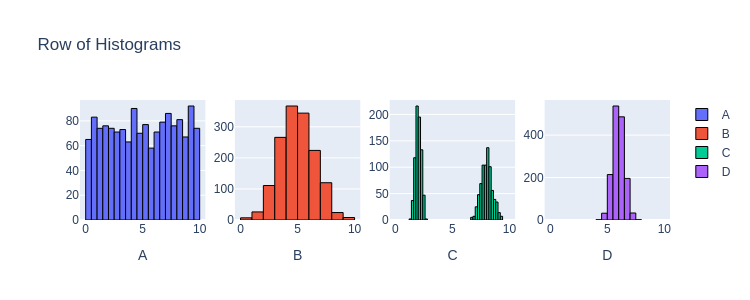

In [23]:
from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

fig = make_subplots(rows=1, cols=4)

fig.add_trace(go.Histogram(x=data1, name='A', nbinsx=30, marker=dict(line=dict(color='black', width=1))), row=1, col=1)
fig.add_trace(go.Histogram(x=data2, name='B', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=2)
fig.add_trace(go.Histogram(x=data3, name='C', nbinsx=45, marker=dict(line=dict(color='black', width=1))), row=1, col=3)
fig.add_trace(go.Histogram(x=data4, name='D', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=4)

fig.update_layout(height=300, width=750, title_text="Row of Histograms")
fig.update_xaxes(title_text="A", row=1, col=1)
fig.update_xaxes(title_text="B", row=1, col=2)
fig.update_xaxes(title_text="C", row=1, col=3)
fig.update_xaxes(title_text="D", row=1, col=4)
fig.update_xaxes(range=[-0.5, 10.5])

for trace in fig.data:
    trace.xbins = dict(start=0, end=10)
    
# This code was produced by just making requests to Microsoft Copilot
# https://github.com/pointOfive/stat130chat130/blob/main/CHATLOG/wk3/COP/SLS/0001_concise_makeAplotV1.md

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

1. A and C seem to have similar means and variances as they both appear to have a mean of five and high variance.

2. A and B, as well as B and C seem to have similar means but different variances as they all appear to have a mean of five, but A and C have a much higher variance than B.

3. B and D seem to have similar variances but different means as they both have low variance, while B having a mean of around 5 and D having a mean of around 6.

4. C and D, as well as A and D seem to have both different means and variances.

ChatGPT summary:

In our conversation, we discussed different methods for visualizing data distributions:

Initial Problem: We started with a problem involving marking the location (mean and median) and scale (range, interquartile range, and two standard deviations from the mean) on histograms for different penguin species' flipper lengths using Plotly.

Plotting with Seaborn: After addressing some overlapping text issues, you requested to transition from Plotly histograms to Seaborn kernel density estimation (KDE) plots. We created Seaborn KDE plots for the same data, marking key statistics and organizing the visualizations in a row of three plots for different penguin species.

Comparison of Visualization Methods: You asked about the differences between box plots, histograms, and KDEs. I provided a detailed comparison:

Box plots: Display data using quartiles, medians, and outliers but do not show the detailed shape of the distribution.
Histograms: Show frequency distributions in bins, giving insights into the shape but can be sensitive to bin sizes.
KDEs: Provide a smooth estimate of the data distribution, less dependent on bins but sensitive to the choice of bandwidth.
Pros and Cons: I gave a pros and cons list for each method, explaining their advantages (e.g., clarity, ability to detect outliers) and limitations (e.g., loss of detail, sensitivity to parameters).

Overall, we explored and compared multiple ways to visualize data distribution, focusing on practical use cases and how to interpret them effectively.


https://chatgpt.com/share/66f4dcdc-891c-8013-ad67-bea185ba6348

# Post-Lecture

Question 5

The mean is the average of all values, while the median is the "middle" value meaning that there are as many values below it as there are values above it. When the values are skewed right, the mean is higher than the median, and when they're skewed left the median is higher than the mean. This occurs because the mean is sensitive to extreme outlying values, and in a right-skewed distribution, the larger values will pull the mean upward while the median stays closer to the majority of the data; and when the values are skewed left, the smaller values on the left pull the mean down, while the median remains closer to the bulk of the data.

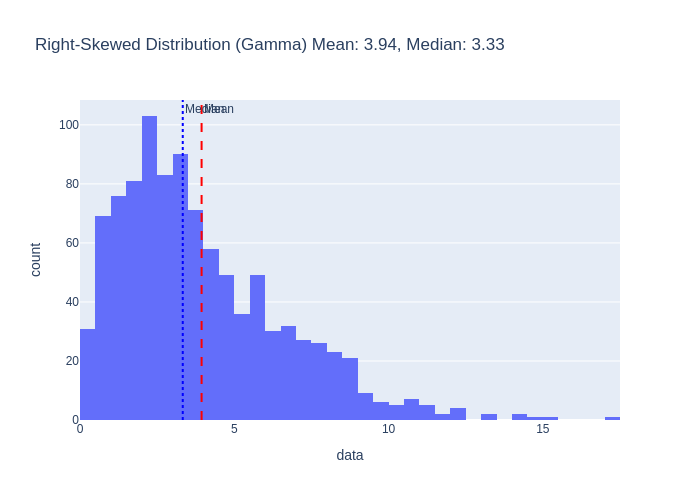

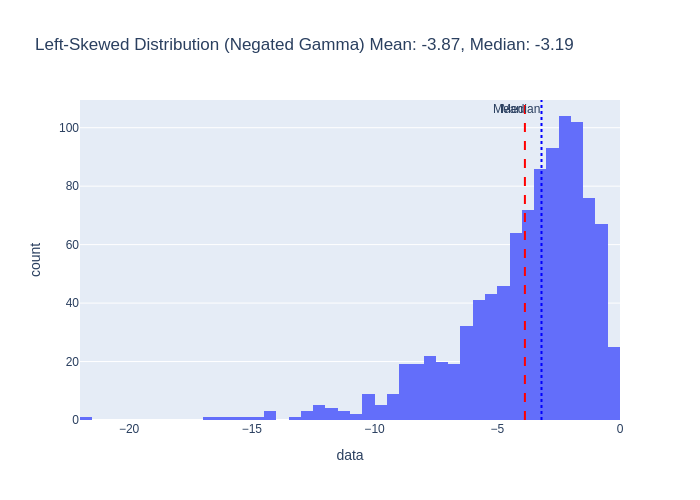

Right-skewed distribution - Mean: 3.94, Median: 3.33
Left-skewed distribution - Mean: -3.87, Median: -3.19


In [12]:
from scipy import stats
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

# Generating a right-skewed distribution (Gamma distribution)
sample1 = stats.gamma(a=2, scale=2).rvs(size=1000)
mean1 = sample1.mean()
median1 = np.quantile(sample1, [0.5])[0]

# Visualizing the right-skewed distribution
fig1 = px.histogram(pd.DataFrame({'data': sample1}), x="data", nbins=50,
                    title=f"Right-Skewed Distribution (Gamma)\nMean: {mean1:.2f}, Median: {median1:.2f}")
fig1.add_vline(x=mean1, line_dash="dash", line_color="red", annotation_text="Mean", annotation_position="top right")
fig1.add_vline(x=median1, line_dash="dot", line_color="blue", annotation_text="Median", annotation_position="top right")
fig1.show(renderer="png")

# Generating a left-skewed distribution by negating the right-skewed distribution
sample2 = -stats.gamma(a=2, scale=2).rvs(size=1000)
mean2 = sample2.mean()
median2 = np.quantile(sample2, [0.5])[0]

# Visualizing the left-skewed distribution
fig2 = px.histogram(pd.DataFrame({'data': sample2}), x="data", nbins=50,
                    title=f"Left-Skewed Distribution (Negated Gamma)\nMean: {mean2:.2f}, Median: {median2:.2f}")
fig2.add_vline(x=mean2, line_dash="dash", line_color="red", annotation_text="Mean", annotation_position="top left")
fig2.add_vline(x=median2, line_dash="dot", line_color="blue", annotation_text="Median", annotation_position="top left")
fig2.show(renderer="png")

# Printing the results for both samples
print(f"Right-skewed distribution - Mean: {mean1:.2f}, Median: {median1:.2f}")
print(f"Left-skewed distribution - Mean: {mean2:.2f}, Median: {median2:.2f}")


Here we can see the difference between the mean and the median both when the distribution is skewed left and when it's skewed right. 

ChatGPT summary

Here's a summary of our chat:

Exploring Mean, Median, and Skewness:

You asked about the general relationship between the mean and median in right (positively) and left (negatively) skewed distributions. I explained that in a right-skewed distribution, the mean is greater than the median, while in a left-skewed distribution, the mean is less than the median. This happens because the mean is sensitive to outliers and extreme values, which pull it towards the tail of the distribution, while the median is more robust.
Explaining and Extending the Code:

You provided some Python code that generated and visualized a sample from a Gamma distribution (a right-skewed distribution) and asked for an explanation and extension. I walked you through the code and then extended it to generate both right- and left-skewed distributions, visualize their histograms, and compute the mean and median for each sample. I also added visual indicators for the mean and median on the histograms and compared the two skewed distributions.
Exploring the Relationship Further:

I extended the code to show how negating the Gamma distribution creates a left-skewed version, where the mean becomes smaller than the median. We discussed how skewness affects the relationship between the mean and median, with the key point being that in right-skewed distributions, the mean is larger than the median, and in left-skewed distributions, the mean is smaller than the median.

https://chatgpt.com/share/66f6030e-e884-8013-b31c-cb15d4e34d22

Question 6

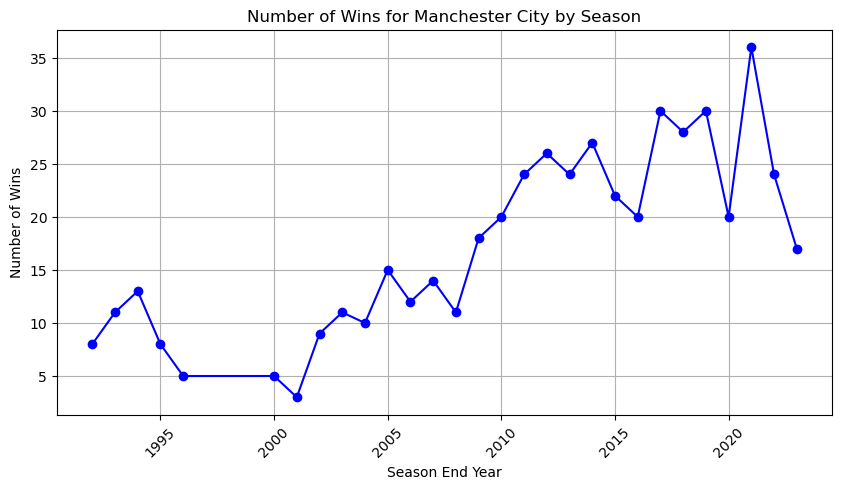

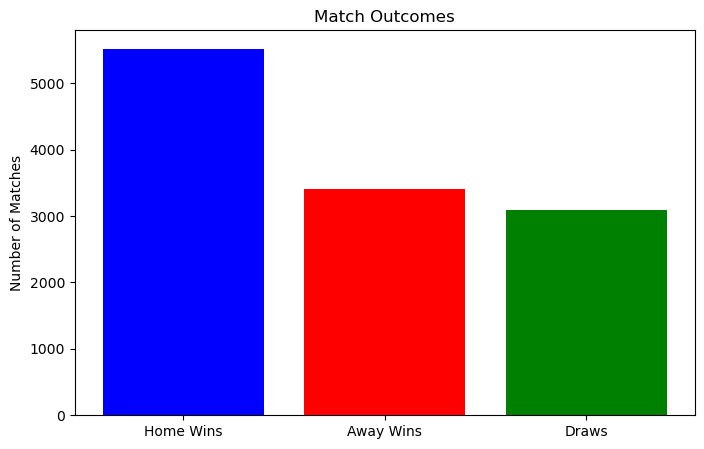

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('premier-league-matches.csv')

# Generate summary statistics
summary_stats = df.describe()

# Convert 'Date' column to datetime format and extract the year
df['Date'] = pd.to_datetime(df['Date'])
df['Season_End_Year'] = df['Date'].dt.year

# Filter for Manchester City matches
man_city_home = df[df['Home'] == 'Manchester City']
man_city_away = df[df['Away'] == 'Manchester City']

# Calculate wins for Manchester City
man_city_home_wins = man_city_home[man_city_home['FTR'] == 'H'].groupby('Season_End_Year').size()
man_city_away_wins = man_city_away[man_city_away['FTR'] == 'A'].groupby('Season_End_Year').size()

# Combine home and away wins
man_city_wins = man_city_home_wins.add(man_city_away_wins, fill_value=0)

# Plotting the number of wins by season
plt.figure(figsize=(10, 5))
plt.plot(man_city_wins.index, man_city_wins.values, marker='o', color='blue')
plt.title('Number of Wins for Manchester City by Season')
plt.xlabel('Season End Year')
plt.ylabel('Number of Wins')
plt.xticks(rotation=45)
plt.grid()
plt.show()

# Home vs. Away Performance
home_wins = df[df['FTR'] == 'H'].shape[0]  # Home win
away_wins = df[df['FTR'] == 'A'].shape[0]  # Away win
draws = df[df['FTR'] == 'D'].shape[0]       # Draw

plt.figure(figsize=(8, 5))
plt.bar(['Home Wins', 'Away Wins', 'Draws'], [home_wins, away_wins, draws], color=['blue', 'red', 'green'])
plt.title('Match Outcomes')
plt.ylabel('Number of Matches')
plt.show()


The dataset I used is one of every English Premier League game played between 1992 and 2022. The first graph shows us how Manchester City started performing better in 2008 after their aqcuisition by the Abu Dhabi United Group which gave them a higher budget. The second graph "proves" home game advantage, showing us that the most likely result in a match is a home win. 

Question 7

In [14]:
import plotly.express as px
df = px.data.gapminder()
px.scatter(df, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
           size="pop", color="continent", hover_name="country",
           log_x=True, size_max=55, range_x=[100,100000], range_y=[25,90])

Question 8

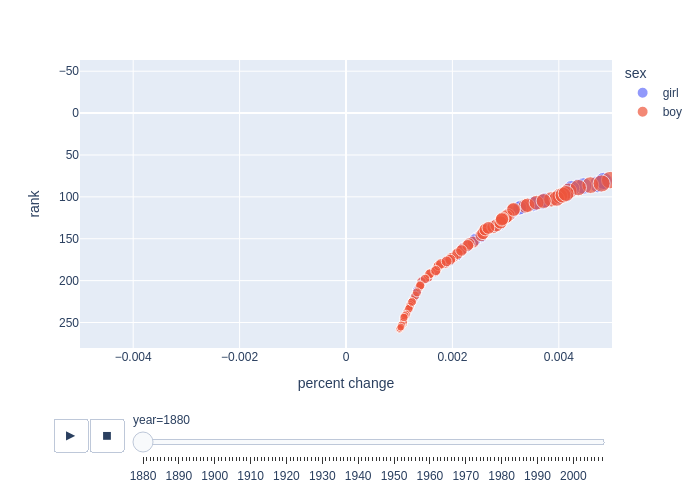

In [19]:
import pandas as pd
import plotly.express as px

# Load the baby names dataset
bn = pd.read_csv('https://raw.githubusercontent.com/hadley/data-baby-names/master/baby-names.csv')

# Make identical boy and girl names distinct
bn['name'] = bn['name'] + " " + bn['sex']

# Calculate the rank based on percent for each year
bn['rank'] = bn.groupby('year')['percent'].rank(ascending=False)

# Sort the DataFrame by name and year
bn = bn.sort_values(['name', 'year'])

# Calculate the change in name prevalence from the last year
bn['percent change'] = bn['percent'].diff()

# Create a new column for the first occurrence of each name
new_name = [True] + list(bn.name[:-1].values != bn.name[1:].values)
bn.loc[new_name, 'percent change'] = bn.loc[new_name, 'percent']

# Sort values by year
bn = bn.sort_values('year')

# Restrict to common names (percent > 0.001)
bn = bn[bn.percent > 0.001]

# Create the scatter plot with the specified parameters
fig = px.scatter(bn, 
                 x="percent change",         # Percent change on x-axis
                 y="rank",                   # Rank on y-axis
                 animation_frame="year",     # Year for animation
                 animation_group="name",     # Group by name for animation
                 size="percent",             # Size based on percent
                 color="sex",                # Color by sex
                 hover_name="name",          # Hover information
                 size_max=50,                # Maximum size of points
                 range_x=[-0.005, 0.005]    # Range for x-axis
                )

# Update y-axis to have rank 1 on top
fig.update_yaxes(autorange='reversed')

# Show the plot with renderer suitable for submissions
fig.show(renderer="png")


Question 9

Mostly 

ChatGPT summary

Here's a summary of our conversation:

Premier League Matches Dataset:

You initially asked for help analyzing a dataset of Premier League matches from 1992 to 2022, focusing on summary statistics and visualizations.
We discussed loading the dataset, performing calculations, and creating visualizations to explore various aspects of the data.
Code Adjustments:

You requested changes to the code to focus on specific visualizations, such as the number of wins by Manchester City each year.
I provided revised code snippets tailored to your requests, including handling errors and ensuring correct visualizations.
Baby Names Dataset:

You introduced a new dataset on baby names and asked for a scatter plot visualization using Plotly Express, specifying various parameters.
You encountered an error due to not properly defining the parameters for the plot. I helped identify the issues and provided corrected code for generating the desired scatter plot.
Complete Code:

I provided complete, runnable code for both the Premier League analysis and the baby names visualization, ensuring all parameters were correctly set.
If you have any further questions or need assistance with anything else, feel free to ask!

https://chatgpt.com/share/66f624bd-7430-8013-9f62-eaec630ae794